In [1]:
#importing dependencies
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Selecting NSE Tickers for Diverse Sectors
tickers = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS',
           'ITC.NS', 'ICICIBANK.NS', 'SBIN.NS', 'BAJFINANCE.NS', 'HCLTECH.NS']

In [3]:
# Step 2: Downloading Historical Data (Last 2 Years)
data = yf.download(tickers, start='2022-01-01', end='2024-01-01')

[*********************100%%**********************]  10 of 10 completed


In [4]:
# Step 3: Calculating Daily Returns and Additional Metrics
daily_returns = data['Adj Close'].pct_change().dropna()
volatility = daily_returns.std()
avg_volume = data['Volume'].mean()

In [5]:
# Step 4: Creating a DataFrame with the Metrics
metrics = pd.DataFrame({
    'Volatility': volatility,
    'Avg_Volume': avg_volume
})

In [6]:
# Checking if the metrics DataFrame is correctly populated
print("Metrics DataFrame:")
print(metrics)

Metrics DataFrame:
               Volatility    Avg_Volume
Ticker                                 
BAJFINANCE.NS    0.018029  1.132214e+06
HCLTECH.NS       0.014734  3.033219e+06
HDFCBANK.NS      0.013635  1.195626e+07
HINDUNILVR.NS    0.012976  1.610199e+06
ICICIBANK.NS     0.012346  1.472273e+07
INFY.NS          0.016126  6.514725e+06
ITC.NS           0.012080  1.407628e+07
RELIANCE.NS      0.014158  6.824662e+06
SBIN.NS          0.014978  1.586636e+07
TCS.NS           0.013136  2.140386e+06


In [7]:
# Step 5: Standardizing the Data
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(metrics)

In [8]:
# Checking if scaling was successful
print("Scaled Metrics:")
print(scaled_metrics)

Scaled Metrics:
[[ 2.19398388 -1.19577669]
 [ 0.29618923 -0.85422735]
 [-0.33676905  0.74895567]
 [-0.71663349 -1.1098981 ]
 [-1.07912704  1.24600028]
 [ 1.09826749 -0.22871317]
 [-1.23252953  1.12985458]
 [-0.03541517 -0.17302753]
 [ 0.4365704   1.45147289]
 [-0.62453672 -1.01464057]]


In [9]:
# Step 6: Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
metrics['Cluster'] = kmeans.fit_predict(scaled_metrics)

In [10]:
# Step 7: Applying PCA to Reduce Dimensionality
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_metrics)

In [11]:
# Ensuring PCA output is valid
print("PCA Components:")
print(pca_components)

PCA Components:
[[ 2.39692268  0.70583907]
 [ 0.81346737 -0.39459254]
 [-0.76772331  0.29145995]
 [ 0.27808008 -1.29155287]
 [-1.6441133   0.1179972 ]
 [ 0.93831702  0.61486775]
 [-1.67045782 -0.07260215]
 [ 0.09730664 -0.14739125]
 [-0.71764444  1.33504821]
 [ 0.27584508 -1.15907337]]


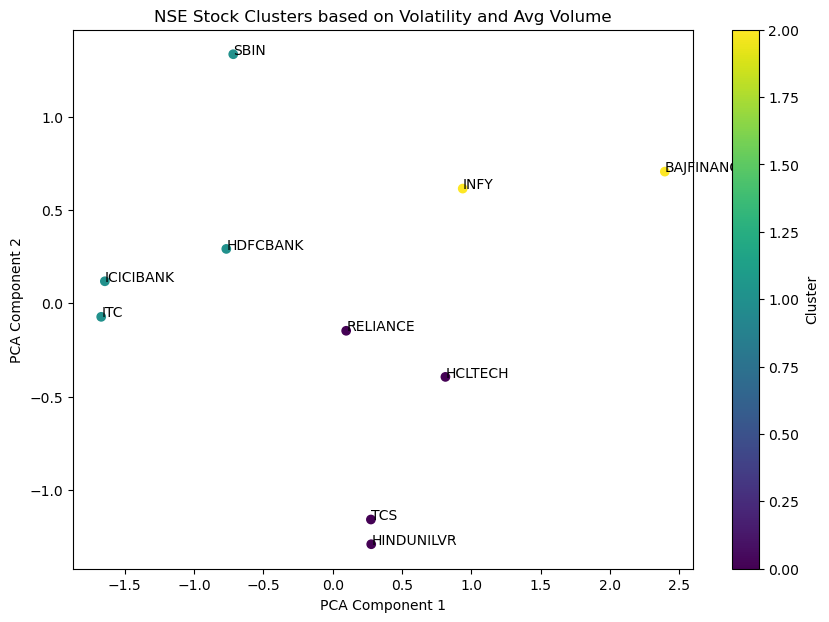

In [12]:
# Step 8: Visualizing the Clusters Using PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=metrics['Cluster'], cmap='viridis')
for i, ticker in enumerate(metrics.index):
    plt.annotate(ticker.split('.')[0], (pca_components[i, 0], pca_components[i, 1]))  # Remove '.NS' for readability
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('NSE Stock Clusters based on Volatility and Avg Volume')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
# Step 9: Analyzing the Stocks in Each Cluster
for i in range(3):  # Assuming 3 clusters
    cluster_stocks = metrics[metrics['Cluster'] == i]
    print(f"Cluster {i}: {cluster_stocks.index.tolist()}")

Cluster 0: ['HCLTECH.NS', 'HINDUNILVR.NS', 'RELIANCE.NS', 'TCS.NS']
Cluster 1: ['HDFCBANK.NS', 'ICICIBANK.NS', 'ITC.NS', 'SBIN.NS']
Cluster 2: ['BAJFINANCE.NS', 'INFY.NS']
